In [26]:
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') # For plots

In [27]:
df_matches = pd.read_csv('data/euro/Uefa Euro Cup All Matches.csv', encoding='utf8')
df_players = pd.read_csv('data/euro/Uefa Euro Cup All Players.csv')
df_cup_stats = pd.read_csv('data/euro/Uefa Euro Cup General Statistics.csv')
df_team_stats = pd.read_csv('data/euro/Uefa Euro Cup Participated Teams General Statistics.csv')

In [28]:
df_team_stats = df_team_stats.append({"Team":"North Macedonia", "Points/match": 0}, ignore_index=True)
df_team_stats = df_team_stats.append({"Team":"Finland", "Points/match": 0}, ignore_index=True)

,Rank,Team,Participations,Played,Win,Draw,Loss,Goal_For,Goal_Against,Goal_Difference,Points,Points/match
0,1.0,Germany,12.0,49.0,26.0,12.0,11.0,72.0,48.0,24,90.0,1.84
1,2.0,France,9.0,39.0,20.0,9.0,10.0,62.0,44.0,18,69.0,1.77
2,3.0,Spain,10.0,40.0,19.0,11.0,10.0,55.0,36.0,19,68.0,1.70
3,4.0,Italy,9.0,38.0,16.0,16.0,6.0,39.0,27.0,12,64.0,1.68
4,5.0,Portugal,7.0,35.0,18.0,9.0,8.0,49.0,31.0,18,63.0,1.80
5,6.0,Netherlands,9.0,35.0,17.0,8.0,10.0,57.0,37.0,20,59.0,1.69
6,7.0,Czech Republic,9.0,32.0,13.0,6.0,13.0,42.0,43.0,−1,45.0,1.41
7,8.0,Russia,11.0,33.0,12.0,7.0,14.0,38.0,45.0,−7,43.0,1.30
8,9.0,England,9.0,31.0,10.0,11.0,10.0,40.0,35.0,5,41.0,1.32
9,10.0,Croatia,5.0,18.0,8.0,5.0,5.0,23.0,20.0,3,29.0,1.61


In [29]:
df_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Date                  286 non-null    object
 1   Time                  286 non-null    object
 2   HomeTeamName          286 non-null    object
 3   AwayTeamName          286 non-null    object
 4   HomeTeamGoals         286 non-null    int64 
 5   AwayTeamGoals         286 non-null    int64 
 6   Stage                 286 non-null    object
 7   SpecialWinConditions  33 non-null     object
 8   Stadium               286 non-null    object
 9   City                  286 non-null    object
 10  Attendance            286 non-null    int64 
 11  Year                  286 non-null    int64 
dtypes: int64(4), object(8)
memory usage: 26.9+ KB


In [30]:
df_matches.head()

,Date,Time,HomeTeamName,AwayTeamName,HomeTeamGoals,AwayTeamGoals,Stage,SpecialWinConditions,Stadium,City,Attendance,Year
0,6 July 1960 (1960-07-06),20:00,France,Yugoslavia,4,5,Semi-finals,NaN,Parc des Princes,Paris,26370,1960
1,6 July 1960 (1960-07-06),21:30,Czechoslovakia,Soviet Union,0,3,Semi-finals,NaN,Stade Vélodrome,Marseille,25184,1960
2,9 July 1960 (1960-07-09),21:30,Czechoslovakia,France,2,0,Third place play-off,NaN,Stade Vélodrome,Marseille,9438,1960
3,10 July 1960 (1960-07-10),21:30,Soviet Union,Yugoslavia,2,1,Final,Soviet Union win after extra time,Parc des Princes,Paris,17966,1960
4,17 June 1964 (1964-06-17),20:00,Spain,Hungary,2,1,Semi-finals,Spain win after extra time,Santiago Bernabéu,Madrid,34713,1964


In [31]:
df_team_stats.head()

,Rank,Team,Participations,Played,Win,Draw,Loss,Goal_For,Goal_Against,Goal_Difference,Points,Points/match
0,1,Germany,12,49,26,12,11,72,48,24,90,1.84
1,2,France,9,39,20,9,10,62,44,18,69,1.77
2,3,Spain,10,40,19,11,10,55,36,19,68,1.70
3,4,Italy,9,38,16,16,6,39,27,12,64,1.68
4,5,Portugal,7,35,18,9,8,49,31,18,63,1.80


In [32]:
df_team_stats.Team.to_list()

['Germany',
 'France',
 'Spain',
 'Italy',
 'Portugal',
 'Netherlands',
 'Czech Republic',
 'Russia',
 'England',
 'Croatia',
 'Denmark',
 'Belgium',
 'Sweden',
 'Greece',
 'Turkey',
 'Wales',
 'Poland',
 'Switzerland',
 'Serbia',
 'Iceland',
 'Hungary',
 'Republic of Ireland',
 'Romania',
 'Scotland',
 'Norway',
 'Slovakia',
 'Bulgaria',
 'Albania',
 'Northern Ireland',
 'Ukraine',
 'Slovenia',
 'Austria',
 'Latvia']

In [33]:
df_matches.HomeTeamGoals

0      4
1      0
2      2
3      2
4      2
      ..
281    1
282    5
283    2
284    0
285    1
Name: HomeTeamGoals, Length: 286, dtype: int64

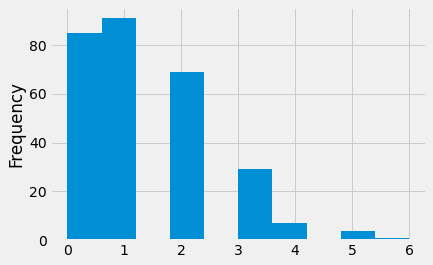

In [34]:
df_matches.HomeTeamGoals.plot(kind="hist");

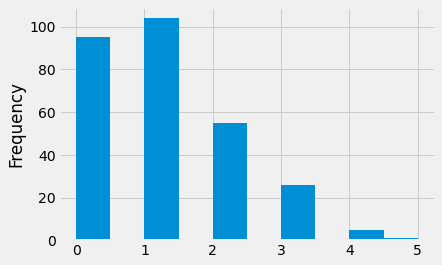

In [35]:
df_matches.AwayTeamGoals.plot(kind="hist");

In [36]:
df_matches.SpecialWinConditions.dropna().to_list()

['Soviet Union\xa0 win after extra time ',
 'Spain\xa0 win after extra time ',
 'Hungary\xa0 win after extra time ',
 '\xa0Soviet Union win after extra time ',
 '\xa0Yugoslavia win after extra time ',
 'Czechoslovakia\xa0 win after extra time ',
 '\xa0West Germany win after extra time ',
 'Netherlands\xa0 win after extra time ',
 'Czechoslovakia\xa0 win on Penalities 5–3',
 'France\xa0 win after extra time ',
 '\xa0Spain win on Penalities 4–5',
 '\xa0Denmark win on Penalities 4–5',
 '\xa0England win on Penalities 2–4',
 'France\xa0 win on Penalities 5–4',
 '\xa0Czech Republic win on Penalities 5–6',
 'Germany\xa0 win on Penalities 6–5',
 '\xa0Germany win after extra time ',
 'France\xa0 win after extra time ',
 'Italy\xa0 win on Penalities 3–1',
 'France\xa0 win after extra time ',
 'Portugal\xa0 win on Penalities 6–5',
 '\xa0Netherlands win on Penalities 4–5',
 'Greece\xa0 win after extra time ',
 '\xa0Turkey win on Penalities 1–3',
 '\xa0Russia win after extra time ',
 'Spain\xa0 win

In [37]:
# df_matches.HomeTeamName.to_list()
df_team_stats.Team.to_list()

['Germany',
 'France',
 'Spain',
 'Italy',
 'Portugal',
 'Netherlands',
 'Czech Republic',
 'Russia',
 'England',
 'Croatia',
 'Denmark',
 'Belgium',
 'Sweden',
 'Greece',
 'Turkey',
 'Wales',
 'Poland',
 'Switzerland',
 'Serbia',
 'Iceland',
 'Hungary',
 'Republic of Ireland',
 'Romania',
 'Scotland',
 'Norway',
 'Slovakia',
 'Bulgaria',
 'Albania',
 'Northern Ireland',
 'Ukraine',
 'Slovenia',
 'Austria',
 'Latvia']

In [39]:
pairings = [
    ["Italy", "Turkey"],
    ["Wales", "Switzerland"],
    ["Denmark", "Finland"],
    ["Belgium", "Russia"],
    ["England", "Croatia"],
    ["Austria", "North Macedonia"],
    ["Netherlands", "Ukraine"],
    # 
    ["Scotland", "Czech Republic"],
    ["Poland", "Slovakia"],
    ["Spain", "Sweden"],
    ["Hungary", "Portugal"],
    ["France", "Germany"],
]

for p in pairings:
    teams = [x for x in p if x is not None]
    current_pairing = df_team_stats.loc[df_team_stats.Team.isin(teams)][["Team","Points/match"]]
    match = current_pairing.to_dict(orient="records")
    t1 = match[0]["Team"]
    p1 = match[0]["Points/match"]
    t2 = match[1]["Team"]
    p2 = match[1]["Points/match"]
    print(f"{t1} {p1} - {t2} {p2}")


Italy 1.68 - Turkey 0.93
Wales 2.0 - Switzerland 0.85


IndexError: list index out of range